In [2]:
# !pip install noise

In [42]:
def plot_tensor(array):
#     array = array.numpy()
    array = array.transpose(1, 2, 0)
    plt.imshow(array, cmap = 'gray')
    plt.axis('off')  # Optional: turn off the axis
    plt.show()

In [463]:
grid = np.random.rand(*shape)


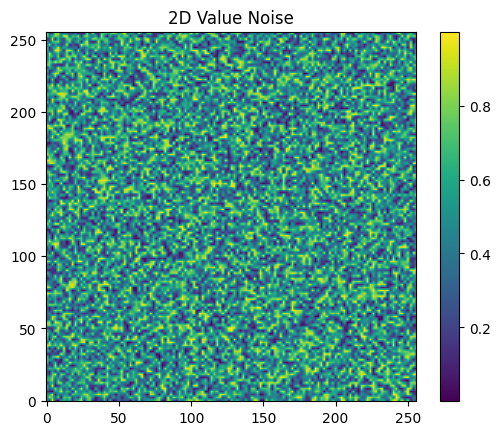

In [148]:
import numpy as np
import matplotlib.pyplot as plt

def generate_value_noise(shape, scale=2):
    # Generate random values for the grid points
    grid = np.random.rand(*shape)

    # Interpolate the values using bilinear interpolation
    x, y = np.meshgrid(np.arange(shape[1]) / scale, np.arange(shape[0]) / scale)
    x_int, y_int = x.astype(int), y.astype(int)
    x_frac, y_frac = x - x_int, y - y_int

    x1 = x_int % shape[1]
    x2 = (x1 + 1) % shape[1]
    y1 = y_int % shape[0]
    y2 = (y1 + 1) % shape[0]

    # Bilinear interpolation
    value_noise = (1 - x_frac) * (1 - y_frac) * grid[y1, x1] + \
                  x_frac * (1 - y_frac) * grid[y1, x2] + \
                  (1 - x_frac) * y_frac * grid[y2, x1] + \
                  x_frac * y_frac * grid[y2, x2]

    return value_noise

# Set the shape of the noise grid
shape = (256, 256)

# Generate 2D value noise
value_noise = generate_value_noise(shape)

# Visualize the value noise
plt.imshow(value_noise, cmap='viridis', origin='lower')
plt.colorbar()
plt.title('2D Value Noise')
plt.show()


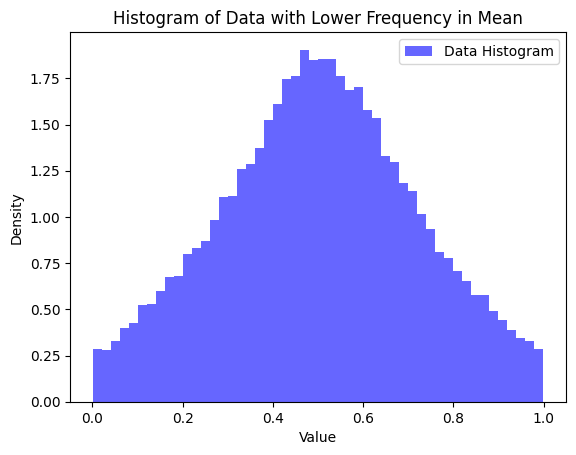

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution
plt.hist(value_noise.flatten(), bins=50, density=True, alpha=0.6, color='blue', label='Data Histogram')
plt.title('Histogram of Data with Lower Frequency in Mean')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


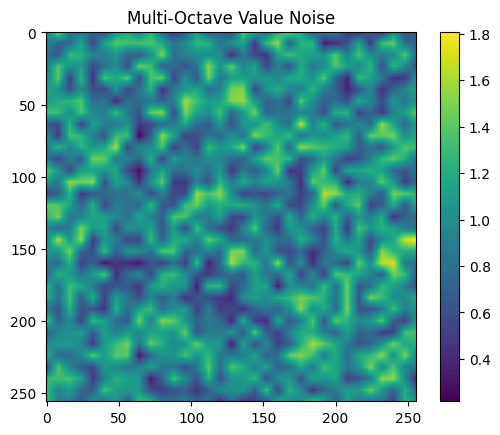

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def generate_multi_octave_value_noise(shape, octaves=6, persistence=0.5, lacunarity=2.0, scale=16):
    # Initialize the noise grid
    value_noise = np.zeros(shape)

    # Generate value noise for each octave
    for octave in range(octaves):
        frequency = 2 ** octave
        amplitude = persistence ** octave

        # Generate value noise for the current octave
        octave_noise = generate_value_noise(shape, scale=scale * frequency)

        # Add the octave noise to the result with proper scaling
        value_noise += amplitude * octave_noise

    # Normalize the result to the range [0, 1]
#     value_noise = (value_noise - value_noise.min()) / (value_noise.max() - value_noise.min())

    return value_noise

# Set the shape of the noise grid
shape = (256, 256)

# Set parameters for multi-octave value noise
octaves = 6
persistence = 0.5
lacunarity = 2.0
scale = 8

# Generate multi-octave value noise
multi_octave_value_noise = generate_multi_octave_value_noise(shape, octaves, persistence, lacunarity, scale)

# Visualize the multi-octave value noise
plt.imshow(multi_octave_value_noise)
plt.colorbar()
plt.title('Multi-Octave Value Noise')
plt.show()


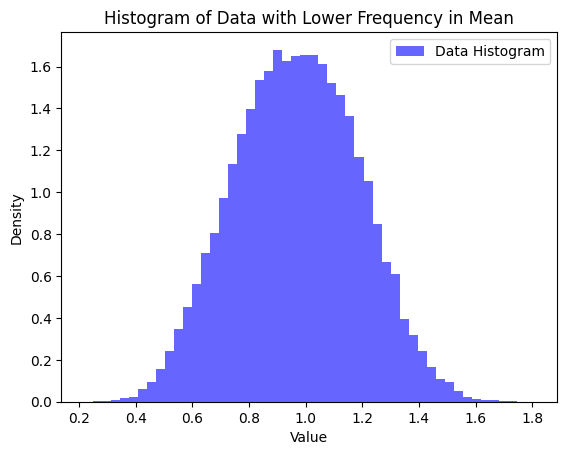

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution
plt.hist(multi_octave_value_noise.flatten(), bins=50, density=True, alpha=0.6, color='blue', label='Data Histogram')
plt.title('Histogram of Data with Lower Frequency in Mean')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [77]:
# plot_tensor(value_noise)

In [458]:
import numpy as np

def generate_multi_octave_3d_value_noise(shape, octaves=2, persistence=0.9, frequency=1):
    # Initialize the noise grid
    noise = np.zeros(shape)
    amplitude = 1
    # Generate value noise for each octave and each channel
    for channel in range(shape[0]):
        value_noise = np.zeros(shape[1:])
        for _ in range(octaves):
            # Generate value noise for the current octave
            octave_noise = generate_value_noise(shape[1:], scale=frequency)
            value_noise += amplitude * octave_noise
#             frequency /= 2
            amplitude *= persistence

        # Normalize each channel to the range [0, 1]
        noise[channel] = value_noise#(value_noise - value_noise.min()) / (value_noise.max() - value_noise.min())#value_noise#

    return noise

# Example usage
shape = (1, 256, 256)
octaves = 1
persistence = 0.9
frequency = 4

noise = generate_multi_octave_3d_value_noise(shape, octaves, persistence, frequency)


In [459]:
noise

array([[[0.1013785 , 0.17699762, 0.25261674, ..., 0.62259077,
         0.69971353, 0.7768363 ],
        [0.19711007, 0.25667673, 0.3162434 , ..., 0.54515008,
         0.59741602, 0.64968196],
        [0.29284164, 0.33635584, 0.37987005, ..., 0.46770939,
         0.49511851, 0.52252763],
        ...,
        [0.19956702, 0.36553243, 0.53149783, ..., 0.11831165,
         0.11077715, 0.10324265],
        [0.18379976, 0.34132554, 0.49885133, ..., 0.15978211,
         0.14798085, 0.13617959],
        [0.1680325 , 0.31711866, 0.46620482, ..., 0.20125257,
         0.18518454, 0.16911652]]])

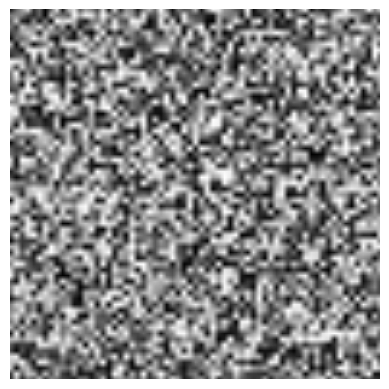

In [460]:
plot_tensor(noise)

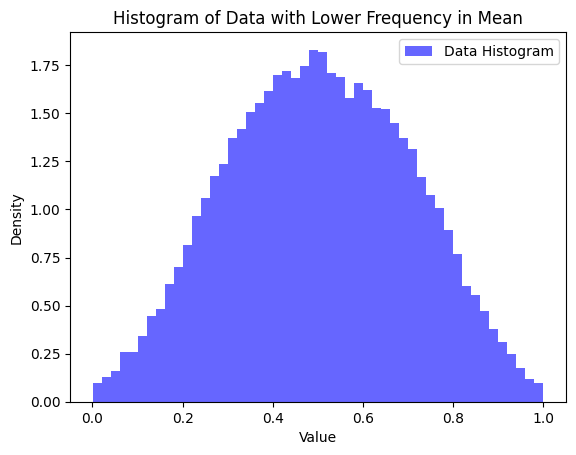

In [461]:
import numpy as np
import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution
plt.hist(noise.flatten(), bins=50, density=True, alpha=0.6, color='blue', label='Data Histogram')
plt.title('Histogram of Data with Lower Frequency in Mean')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [462]:
import numpy as np
from scipy.stats import kurtosis, skew
noise = noise.flatten()
# x = np.random.normal(0, 1, 100000)   # create random values based on a normal distribution

print( 'excess kurtosis of normal distribution (should be 0): {}'.format(
    kurtosis(noise, fisher=False) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(noise) ))

excess kurtosis of normal distribution (should be 0): 2.3755791698519695
skewness of normal distribution (should be 0): -0.00019593497738631819
